<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.3.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2994 - accuracy: 0.9141 - val_loss: 0.1456 - val_accuracy: 0.9558
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1454 - accuracy: 0.9566 - val_loss: 0.1015 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9680 - val_loss: 0.0881 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9722 - val_loss: 0.0778 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0758 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9791 - val_loss: 0.0748 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.0710 - val_accuracy:

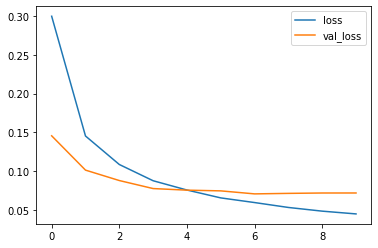

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

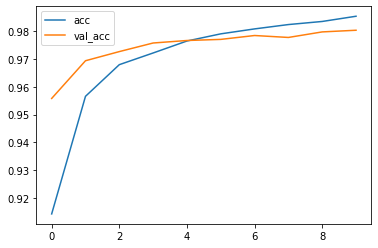

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9804
[0.07212412357330322, 0.980400025844574]


Confusion matrix, without normalization
[[ 973    0    0    1    0    1    1    1    2    1]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   7    1 1008    1    3    0    0    3    9    0]
 [   2    0    6  985    0    8    0    4    0    5]
 [   4    0    3    0  962    0    4    2    0    7]
 [   4    0    0    7    0  875    2    1    3    0]
 [   5    2    0    1    2    4  943    0    1    0]
 [   1    2    7    2    0    0    0 1009    2    5]
 [   3    0    2    6    5    5    1    4  944    4]
 [   3    3    0    6   12    2    0    3    1  979]]


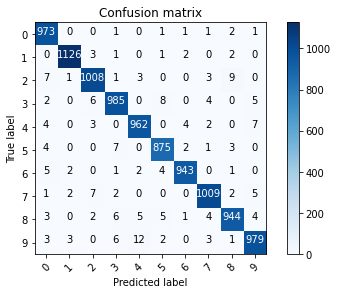

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

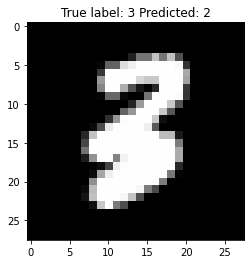

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [13]:
np.where(p_test != y_test)[0]

array([  33,  149,  247,  259,  321,  340,  359,  381,  445,  449,  495,
        582,  610,  613,  674,  691,  717,  720,  740,  844,  874,  938,
        947,  956,  965, 1014, 1112, 1156, 1178, 1194, 1226, 1232, 1247,
       1253, 1260, 1299, 1319, 1328, 1393, 1403, 1522, 1530, 1549, 1553,
       1609, 1678, 1681, 1754, 1790, 1878, 1901, 1941, 1984, 2004, 2016,
       2035, 2044, 2053, 2098, 2109, 2118, 2135, 2182, 2224, 2272, 2293,
       2369, 2387, 2408, 2414, 2433, 2462, 2488, 2630, 2648, 2654, 2720,
       2863, 2877, 2896, 2915, 2921, 2939, 2953, 3060, 3073, 3117, 3130,
       3289, 3422, 3503, 3520, 3549, 3558, 3559, 3567, 3597, 3662, 3681,
       3727, 3749, 3767, 3776, 3780, 3796, 3808, 3811, 3853, 3869, 3893,
       3902, 3906, 3941, 3943, 3985, 4065, 4075, 4078, 4163, 4199, 4224,
       4248, 4289, 4369, 4437, 4443, 4497, 4500, 4601, 4639, 4740, 4761,
       4807, 4823, 4860, 4880, 4943, 4956, 5140, 5331, 5457, 5600, 5634,
       5642, 5734, 5749, 5887, 5888, 5936, 5937, 59